# Глава 20. 
## Нейронные сети
> <b>20.1 Предобработка данных для нейронных сетей

In [1]:
# Загрузить библиотеки
from sklearn import preprocessing
import numpy as np

# Создать признак
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# Создать шкалировщик
scaler = preprocessing.StandardScaler()

# Преобразовать признак
features_standardized = scaler.fit_transform(features)

# Показать признак
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [2]:
# Напечатать среднее значение и стандартное отклонение
print("Среднее значение:", round(features_standardized[:,0].mean()))
print("Стандартное отклонение:", features_standardized[:,0].std())

Среднее значение: 0.0
Стандартное отклонение: 0.9999999999999999


> <b>20.2 Проектирование нейронной сети

In [3]:
# Загрузить библиотеки
# import warnings
from keras import models
from keras import layers

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Подавить раздражающее, но безвредное предупреждение
# warnings.filterwarnings(action="ignore", module="keras")

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",   # Распространение среднеквдадратической ошибки
    metrics=["accuracy"])  # Точностный показатель резу

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


> <b>20.3 Тренировка бинарного классификатора

In [4]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Задать начальное значение 
# для генератора псевдослучайных чисел
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные с отзывами о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", 
                         input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",   # Распространение среднеквдадратической ошибки
    metrics=["accuracy"])  # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=3,       # Количество эпох
    verbose=1,      # Печатать описание после каждой эпохи
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 95us/step - loss: 0.4161 - acc: 0.8140 - val_loss: 0.3351 - val_acc: 0.8581
Epoch 2/3
25000/25000 [==============================] - 2s 67us/step - loss: 0.3245 - acc: 0.8640 - val_loss: 0.3296 - val_acc: 0.8608
Epoch 3/3
25000/25000 [==============================] - 2s 66us/step - loss: 0.3157 - acc: 0.8661 - val_loss: 0.3308 - val_acc: 0.8594


In [5]:
# Взглянуть на форму матрицы признаков
features_train.shape

(25000, 1000)

> <b>20.4 Тренировка мультиклассового классификатора

In [6]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 5000

# Загрузить признаковые и целевые данные
data = reuters.load_data(num_words=number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

# Конвертировать признакове данные в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Преобразовать вектор целей в кодировке с одним активным состоянием,
# чтобы создать матрицу целей
target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=100,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=100, activation="relu"))

# Добавить полносвязный слой с активационной функцией softmax
network.add(layers.Dense(units=46, activation="softmax"))

# Скомпилировать нейронную сеть
network.compile(
    loss="categorical_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Цель
    epochs=3,       # Три эпохи
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

In [7]:
# Осмотреть матрицу целей
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

> <b>20.5 Тренировка регрессора

In [8]:
# Загрузить библиотеки
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Сгенерировать матрицу признаков и вектор целей
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Разделить данные на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.33, random_state=0)

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=32,
    activation="relu",
    input_shape=(features_train.shape[1],)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=32, activation="relu"))

# Добавить полносвязный слой без активационной функции
network.add(layers.Dense(units=1))

# Скомпилировать нейронную сеть
network.compile(
    loss="mse",          # Среднеквдадратическая ошибка
    optimizer="RMSprop", # Оптимизационный алгоритм
    metrics=["mse"])     # Среднеквдадратическая ошибка

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=10,      # Количество эпох
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

> <b>20.6 Выполнение предсказаний

In [9]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 10000

# Загрузить данные и вектор целей из набора данных IMDB о кинофильмах 
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные IMDB о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием 
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=3,       # Количество эпох
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

# Предсказать классы тестового набора
predicted_target = network.predict(features_test)

c:\python36\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136578). Check your callbacks.
  % delta_t_median)


In [10]:
# Взглянуть на вероятность, что первое наблюдение принадлежит классу 1
predicted_target[0]

array([0.05640661], dtype=float32)

> <b>20.7 Визуализация истории процесса тренировки

*Определение стиля изображения*

In [1]:
# Заставить все графики в блокноте Jupyter
# в дальнейшем появляться локально 
%matplotlib inline

# переопределение стиля
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']     = 'sans-serif'
rcParams['font.sans-serif'] = ['Ubuntu Condensed']
rcParams['figure.figsize']  = (4, 3)
rcParams['legend.fontsize'] = 10
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


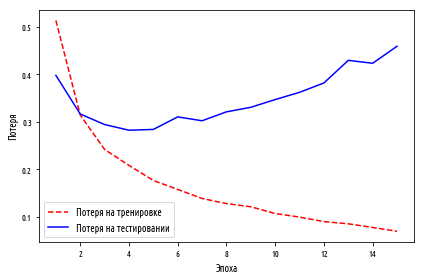

In [2]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 10000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах 
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные отзывов о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием 
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train,  # Признаки
    target_train,    # Цели
    epochs=15,       # Количество эпох
    verbose=0,       # Вывода нет
    batch_size=1000, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

# Получить истории потерь на тренировочных и тестовых данных  
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Создать счетчик количества эпох
epoch_count = range(1, len(training_loss) + 1)

# Визуализировать истории потери
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Потеря на тренировке", 
            "Потеря на тестировании"])
plt.xlabel("Эпоха")
plt.ylabel("Потеря")
plt.tight_layout()
plt.savefig('pics/20_01.png', dpi=600)
plt.show()

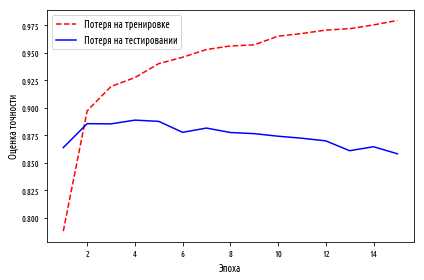

In [3]:
# Получить истории потерь на тренировочных и тестовых данных 
training_accuracy = history.history["acc"]
test_accuracy = history.history["val_acc"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Визуализировать историю потери
plt.legend(["Потеря на тренировке", 
            "Потеря на тестировании"])
plt.xlabel("Эпоха")
plt.ylabel("Оценка точности")
plt.tight_layout()
plt.savefig('pics/20_02.png', dpi=600)
plt.show()

> <b>20.8 Снижение переподгонки с помощью регуляризации весов

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные отзывов о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    kernel_regularizer=regularizers.l2(0.01),
    activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=3,       # Количество эпох
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

> <b>20.9 Снижение переподгонки с помощью ранней остановки

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные отзывов о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Задать функции обратного вызова для ранней остановки тренировки и 
# сохранения наилучшей достигнутой модели
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
             monitor="val_loss",
             save_best_only=True)]

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=20,      # Количество эпох
    callbacks=callbacks, # Ранняя остановка
    verbose=0,      # Печатать описание после каждой эпохи
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

> <b>20.10 Снижение переподгонки с помощью отсева

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные отзывов о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить отсеивающий слой для входного слоя
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить отсеивающий слой для предыдущего скрытого слоя
network.add(layers.Dropout(0.5))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить отсеивающий слой для предыдущего скрытого слоя
network.add(layers.Dropout(0.5))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=3,       # Количество эпох
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

> <b>20.11 Сохранение процесса тренировки модели

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Конвертировать данные отзывов о кинофильмах в
# матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Задать функции обратного вызова для ранней остановки тренировки и 
# сохранения наилучшей достигнутой модели
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train,   # Вектор целей
    epochs=3,       # Количество эпох
    callbacks=checkpoint, # Контрольная точка
    verbose=0,      # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

> <b>20.12 k-блочная перекрестная проверка нейронных сетей

In [4]:
# Загрузить библиотеки
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Количество признаков
number_of_features = 100

# Сгененировать матрицу признаков и вектор целей
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Создать функцию, возвращающую скомпилированную сеть
def create_network():

    # Инициализировать нейронную сеть
    network = models.Sequential()

    # Добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16, 
        activation="relu", 
        input_shape=(number_of_features,)))

    # Добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(units=16, activation="relu"))

    # Добавить полносвязный слой с сигмоидальной активационной функцией
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Скомпилировать нейронную сеть
    network.compile(
        loss="binary_crossentropy", # Перекрестная энтропия
        optimizer="rmsprop",  # Распространение СКО
        metrics=["accuracy"]) # Точностный показатель результативности

    # Вернуть скомпилированную сеть
    return network

# Обернуть модель Keras, чтобы она могла 
# использоваться библиотекой scikit-learn
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)

# Оценить нейронную сеть с помощью 
# трехблочной перекрестной проверки
cross_val_score(neural_network, features, target, cv=3)

array([0.90491901, 0.77617761, 0.86798679])

> <b>20.13 Тонкая настройка нейронных сетей

In [5]:
# Загрузить библиотеки
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Количество признаков
number_of_features = 100

# Сгененировать матрицу признаков и вектор целей
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

# Создать функцию, возвращающую скомпилированную сеть
def create_network(optimizer="rmsprop"):

    # Инициализировать нейронную сеть
    network = models.Sequential()

    # Добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(
        units=16,
        activation="relu",
        input_shape=(number_of_features,)))

    # Добавить полносвязный слой с активационной функцией ReLU
    network.add(layers.Dense(units=16, activation="relu"))

    # Добавить полносвязный слой с сигмоидальной активационной функцией
    network.add(layers.Dense(units=1, activation="sigmoid"))

    # Скомпилировать нейронную сеть
    network.compile(
        loss="binary_crossentropy", # Перекрестная энтропия
        optimizer=optimizer,  # Оптимизатор
        metrics=["accuracy"]) # Точностный показатель результативности

    # Вернуть скомпилированную сеть
    return network

# Обернуть модель Keras, чтобы она могла 
# использоваться библиотекой scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

# Создать гиперпараметрическое пространство
epochs = [5, 10]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam"]

# Создать словарь вариантов гиперпараметров
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# Создать объект решеточного поиска
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Выполнить подгонку объекта решеточного поиска
grid_result = grid.fit(features, target)

In [6]:
# Взглянуть на гиперпараметры наилучшей нейронной сети
grid_result.best_params_

{'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}

> <b>20.14 Визуализация нейронных сетей

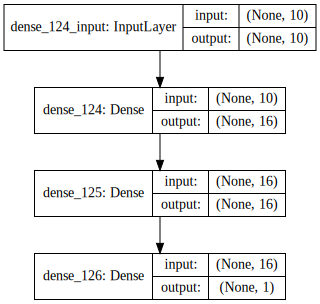

In [7]:
# Загрузить библиотеки
from keras import models
from keras import layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Визуализировать сетевую архитектуру
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))

In [ ]:
# Сохранить визуализацию в виде файла
plot_model(network, show_shapes=True, to_file="network.png")

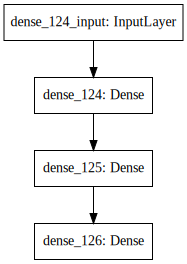

In [8]:
# Визуализировать сетевую архитектуру
SVG(model_to_dot(network, show_shapes=False).create(prog="dot", format="svg"))

In [ ]:
# Сохранить визуализацию в виде файла
plot_model(network, show_shapes=False, to_file="network.png")

> <b>20.15 Классификация изображений

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Сделать значение цветового канала первым
K.set_image_data_format("channels_first")

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать информацию об изображении
channels = 1
height = 28
width = 28

# Загрузить данные и цель из набора данных MNIST рукописных цифр  
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Реформировать тренировочные данные об изображениях в признаки
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# Реформировать тестовые данные об изображениях в признаки
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# Прошкалировать пиксельную интенсивность в диапазон между 0 и 1
features_train = data_train / 255
features_test = data_test / 255

# Преобразовать цель в кодировку с одним активным состоянием
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Инициализировать нейронную сеть
network = Sequential()

# Добавить сверточный слой с 64 фильтрами, окном 5x5 и 
# активационной функций ReLU
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# Добавить максимально редуцирующий слой с окном 2x2
network.add(MaxPooling2D(pool_size=(2, 2)))

# Добавить отсеивающий слой
network.add(Dropout(0.5))

# Добавить слой для сглаживания входа
network.add(Flatten())

# Добавить полносвязный слой из 128 блоков с
# активационной функций ReLU
network.add(Dense(128, activation="relu"))

# Добавить отсеивающий слой
network.add(Dropout(0.5))

# Добавить полносвязный слой c
# активационной функцией softmax
network.add(Dense(number_of_classes, activation="softmax"))

# Скомплировать нейронную сеть
network.compile(
    loss="categorical_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop",  # Распространение СКО
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
network.fit(
    features_train,  # Признаки
    target_train,    # Цель
    epochs=2,        # Количество эпох
    verbose=0,       # Не печатать описание после каждой эпохи
    batch_size=1000, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Данные для оценивания

> <b>20.16 Улучшение результативности с помощью расширения изображения

In [ ]:
# Загрузить библиотеку
from keras.preprocessing.image import ImageDataGenerator

# Создать объект расширения изображения
augmentation = ImageDataGenerator(
    featurewise_center=True, # Применить отбеливание ZCA 
    zoom_range=0.3,          # Случайно приблизить изображения
    width_shift_range=0.2,   # Случайно сместить изображения
    horizontal_flip=True,    # Случайно перевернуть изображения
    rotation_range=90)       # Случайно повернуть изображения

# Обработать все изображения из каталога 'raw/images'
augment_images = augmentation.flow_from_directory(
                                  "raw/images",  # Папка с изображениями
                                  batch_size=32, # Размер пакета
                                  class_mode="binary", # Классы
                                  save_to_dir="processed/images")

In [ ]:
# Натренировать нейронную сеть
network.fit_generator(
    augment_images,
    steps_per_epoch=2000, # Количество вызовов генератора для каждой эпохи
    epochs=5,             # Количество эпох
    validation_data=augment_images_test, # Генератор тестовых данных
    validation_steps=800) # Количество вызовов генератора 
                          # для каждой тестовой эпохи

> <b>20.17 Классификация текста

In [9]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models
from keras import layers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 1000

# Загрузить данные и вектор целей из данных с отзывами о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# Использовать дополнение и усечение, 
# чтобы каждое наблюдение имело 400 признаков
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить встраивающий слой
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))

# Добавить слой длинной краткосрочной памяти с 128 блоками
network.add(layers.LSTM(units=128))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="Adam",           # Оптимизация Adam
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train,  # Признаки
    target_train,    # Цель
    epochs=3,        # Количество эпох
    verbose=0,       # Не печатать описание после каждой эпохи
    batch_size=1000, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

In [10]:
# Взглянуть на первое наблюдение
print(data_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [11]:
# Взглянуть на первое наблюдение
print(features_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   